In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# import plotly.graph_objs as go
# import scipy
# import requests
# import json
# import datetime
# from matplotlib.dates import DateFormatter
# from random import choice

In [ ]:
transfers_df = pd.read_csv('../data/1_year/combined_transfers_1_year.csv')

## Transfer breakdown

<Figure size 1000x600 with 0 Axes>

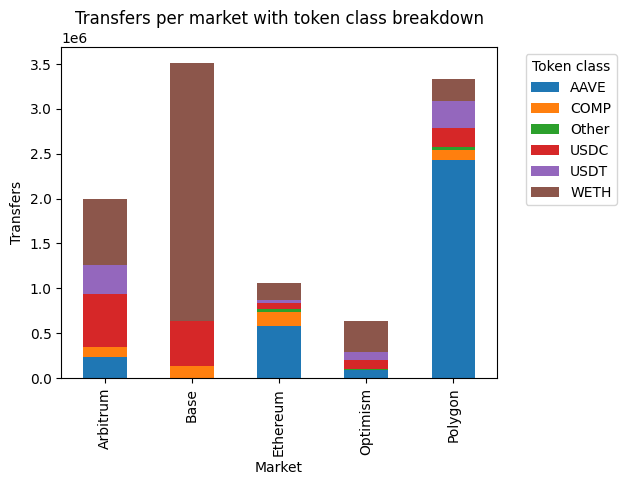

<Figure size 1200x800 with 0 Axes>

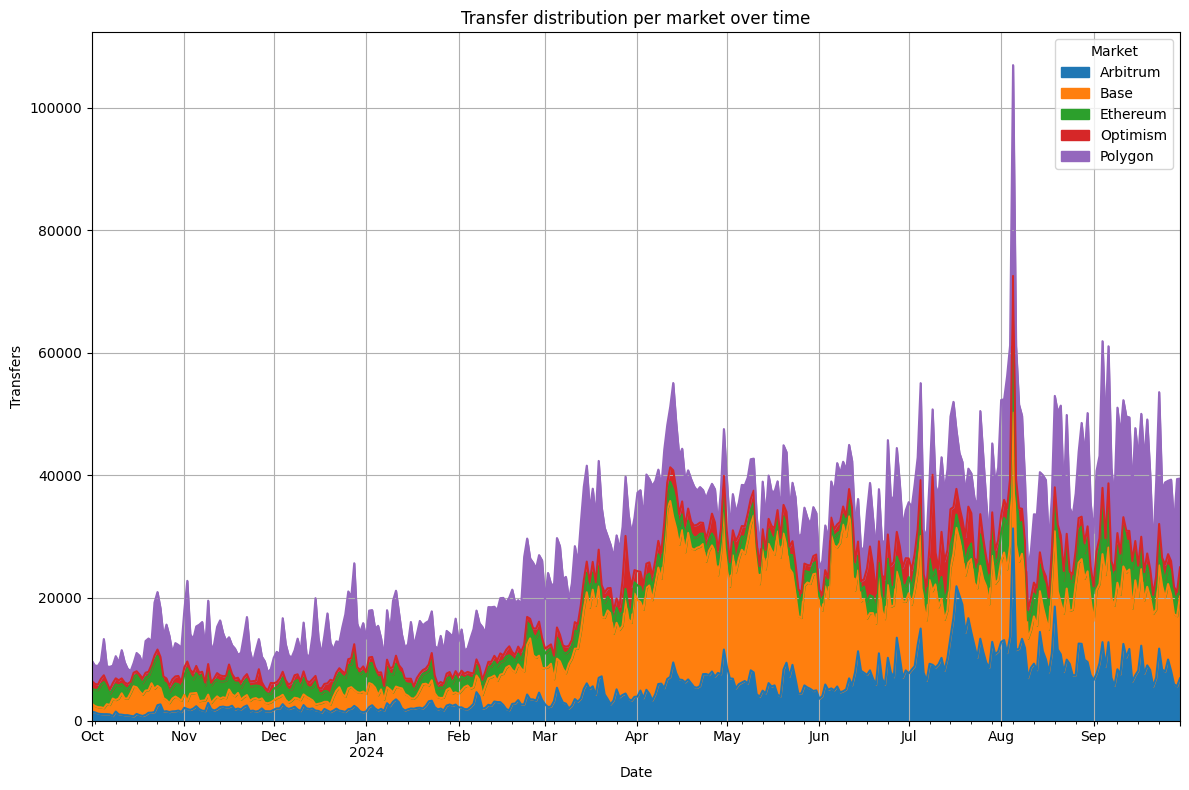

In [ ]:
token_subsets = {
    'Ethereum': ['AAVE', 'aEthAAVE', 'aEthUSDC', 'aEthUSDT', 'aEthWETH', 'stkAAVE', 'cCOMP', 'COMP', 'cUSDCv3', 'cUSDTv3', 'cWETHv3'],
    'Arbitrum': ['aArbAAVE', 'aArbUSDC', 'aArbUSDT', 'aArbWETH', 'ArbAAVE', 'ArbCOMP', 'cArbUSDC', 'cArbUSDT', 'cArbWETH'],
    'Base': ['aBasUSDC', 'aBasWETH', 'BasCOMP', 'cBasUSDC', 'cBasWETH'],
    'Optimism': ['aOptAAVE', 'aOptUSDC', 'aOptUSDT', 'aOptWETH', 'cOptUSDC', 'cOptUSDT', 'cOptWETH', 'OptAAVE', 'OptCOMP'],
    'Polygon': ['aPolAAVE', 'aPolUSDC', 'aPolUSDT', 'aPolWETH', 'cPolUSDT', 'PolAAVE', 'PolCOMP']
}

token_classes = {
    'AAVE': ['AAVE', 'ArbAAVE', 'OptAAVE', 'PolAAVE'],
    'USDC': ['aEthUSDC', 'aArbUSDC', 'aOptUSDC', 'aPolUSDC', 'aBasUSDC', 'cUSDCv3', 'cArbUSDC', 'cBasUSDC', 'cOptUSDC'],
    'USDT': ['aEthUSDT', 'aArbUSDT', 'aOptUSDT', 'aPolUSDT', 'cUSDTv3', 'cArbUSDT', 'cOptUSDT', 'cPolUSDT'],
    'WETH': ['aEthWETH', 'aArbWETH', 'aOptWETH', 'aPolWETH', 'aBasWETH', 'cWETHv3', 'cArbWETH', 'cBasWETH', 'cOptWETH'],
    'COMP': ['COMP', 'ArbCOMP', 'BasCOMP', 'OptCOMP', 'PolCOMP'],
    'Other': ['stkAAVE', 'cCOMP', 'aEthAAVE', 'aArbAAVE', 'aOptAAVE', 'aPolAAVE']
}

token_to_class = {}
for class_name, tokens in token_classes.items():
    for token in tokens:
        token_to_class[token] = class_name

transfers_df['class'] = transfers_df['token'].map(token_to_class).fillna('Other')

subset_class_counts = transfers_df.groupby(['subset', 'class']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
subset_class_counts.plot(kind='bar', stacked=True)
plt.title('Transfers per market with token class breakdown')
plt.xlabel('Market')
plt.ylabel('Transfers')
plt.legend(title='Token class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

transfers_df['date'] = pd.to_datetime(transfers_df['date'])

transfers_df['subset'] = transfers_df['token'].apply(lambda x: next((k for k, v in token_subsets.items() if x in v), 'Other'))

time_subset_counts = transfers_df.groupby(['date', 'subset']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
time_subset_counts.plot(kind='area', stacked=True, figsize=(12, 8))
plt.title('Transfer distribution per market over time')
plt.xlabel('Date')
plt.ylabel('Transfers')
plt.legend(title='Market')
plt.tight_layout()
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

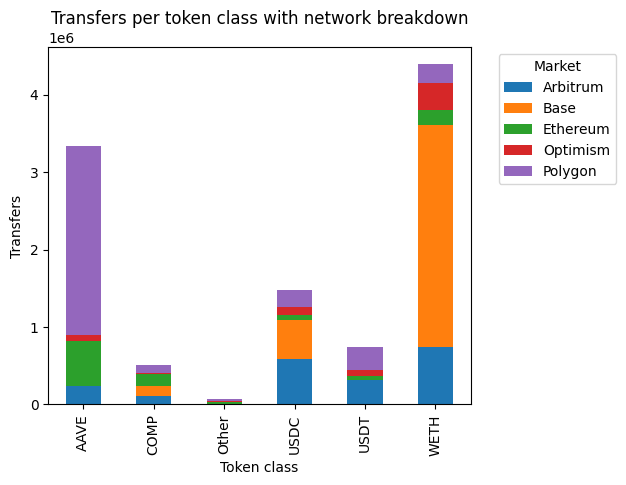

<Figure size 1200x800 with 0 Axes>

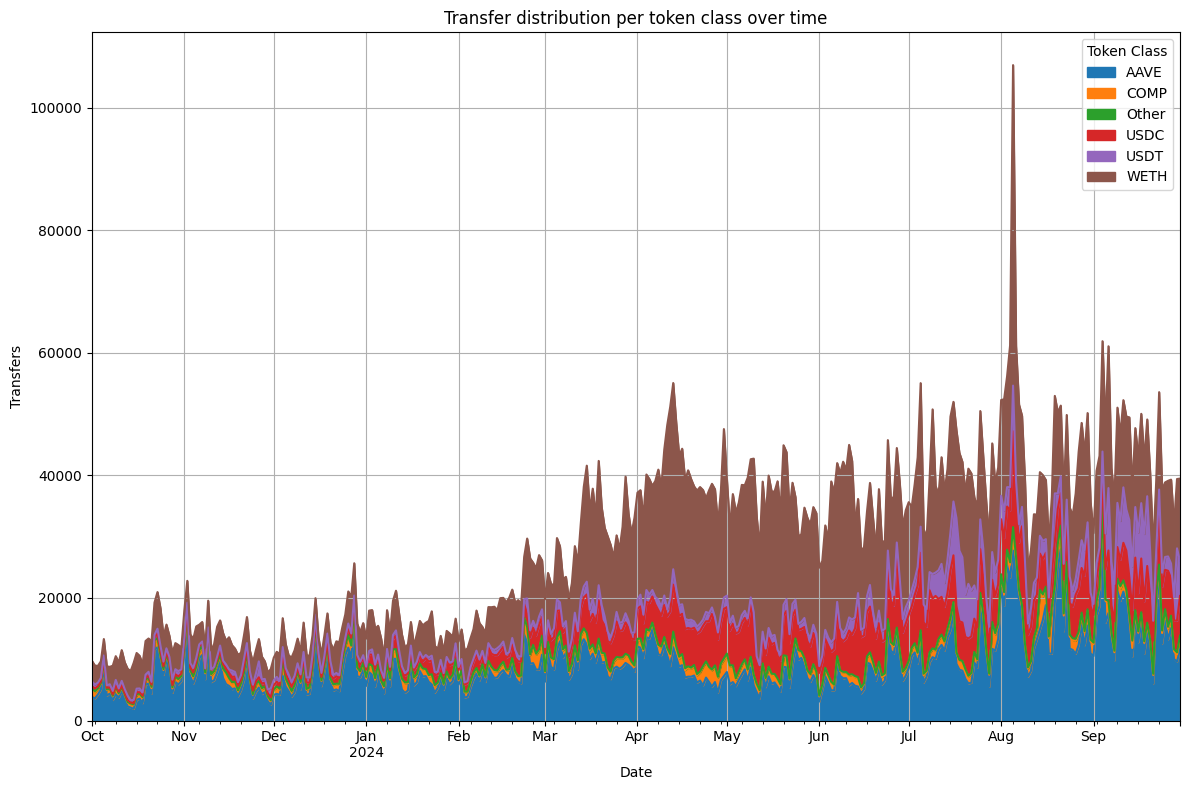

In [ ]:
token_subsets_2 = {
    'AAVE': ['AAVE', 'ArbAAVE', 'OptAAVE', 'PolAAVE'],
    'COMP': ['COMP', 'ArbCOMP', 'BasCOMP', 'OptCOMP', 'PolCOMP'],
    'WETH': ['aEthWETH', 'cWETHv3', 'aArbWETH', 'cArbWETH', 'aBasWETH', 'cBasWETH', 'aOptWETH', 'cOptWETH', 'aPolWETH'],
    'USDC': ['aEthUSDC', 'cUSDCv3', 'aArbUSDC', 'cArbUSDC', 'aBasUSDC', 'cBasUSDC', 'aOptUSDC', 'cOptUSDC', 'aPolUSDC'],
    'USDT': ['aEthUSDT', 'cUSDTv3', 'aArbUSDT', 'cArbUSDT', 'aOptUSDT', 'cOptUSDT', 'aPolUSDT', 'cPolUSDT'],
    'Other': ['stkAAVE', 'cCOMP', 'aEthAAVE', 'aArbAAVE', 'aOptAAVE', 'aPolAAVE']
}

token_classes_2 = {
    'Ethereum': ['AAVE', 'aEthAAVE', 'aEthUSDC', 'aEthUSDT', 'aEthWETH', 'stkAAVE', 'cCOMP', 'COMP', 'cUSDCv3', 'cUSDTv3', 'cWETHv3'],
    'Arbitrum': ['aArbAAVE', 'aArbUSDC', 'aArbUSDT', 'aArbWETH', 'ArbAAVE', 'ArbCOMP', 'cArbUSDC', 'cArbUSDT', 'cArbWETH'],
    'Base': ['aBasUSDC', 'aBasWETH', 'BasCOMP', 'cBasUSDC', 'cBasWETH'],
    'Optimism': ['aOptAAVE', 'aOptUSDC', 'aOptUSDT', 'aOptWETH', 'cOptUSDC', 'cOptUSDT', 'cOptWETH', 'OptAAVE', 'OptCOMP'],
    'Polygon': ['aPolAAVE', 'aPolUSDC', 'aPolUSDT', 'aPolWETH', 'cPolUSDT', 'PolAAVE', 'PolCOMP']
}

token_to_network = {}
token_to_class = {}

for network, tokens in token_classes_2.items():
    for token in tokens:
        token_to_network[token] = network

for class_name, tokens in token_subsets_2.items():
    for token in tokens:
        token_to_class[token] = class_name
        
transfers_df['network'] = transfers_df['token'].map(token_to_network).fillna('Other')
transfers_df['class_2'] = transfers_df['token'].map(token_to_class).fillna('Other')

class_network_counts = transfers_df.groupby(['class_2', 'network']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
class_network_counts.plot(kind='bar', stacked=True)
plt.title('Transfers per token class with network breakdown')
plt.xlabel('Token class')
plt.ylabel('Transfers')
plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

transfers_df['date'] = pd.to_datetime(transfers_df['date'])

time_class_counts = transfers_df.groupby(['date', 'class_2']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
time_class_counts.plot(kind='area', stacked=True, figsize=(12, 8))
plt.title('Transfer distribution per token class over time')
plt.xlabel('Date')
plt.ylabel('Transfers')
plt.legend(title='Token Class')
plt.tight_layout()
plt.grid()
plt.show()

In [5]:
def visualize_subset(subset):
    subset_df = transfers_df[transfers_df['token'].isin(subset)]

    total_counts = subset_df['token'].value_counts()

    plt.figure(figsize=(8, 6))
    total_counts.plot(kind='bar')
    plt.title('Total row counts for token subset')
    plt.xlabel('Token')
    plt.ylabel('Total row count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    subset_df['date'] = pd.to_datetime(subset_df['date'])

    time_counts = subset_df.groupby(['date', 'token']).size().unstack(fill_value=0)

    plt.figure(figsize=(12, 8))
    time_counts.plot(kind='area', stacked=True, figsize=(12, 8))
    plt.title('Daily row counts for token subset over time')
    plt.xlabel('Date')
    plt.ylabel('Row count')
    plt.legend(title='Token')
    plt.tight_layout()
    plt.grid()
    plt.show()

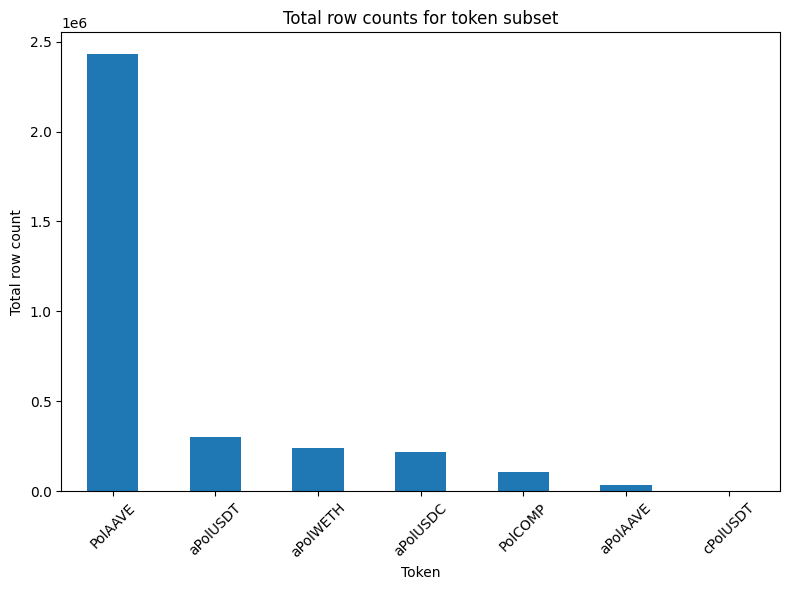

C:\Users\Sam\AppData\Local\Temp\ipykernel_25880\1183190081.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['date'] = pd.to_datetime(subset_df['date'])


<Figure size 1200x800 with 0 Axes>

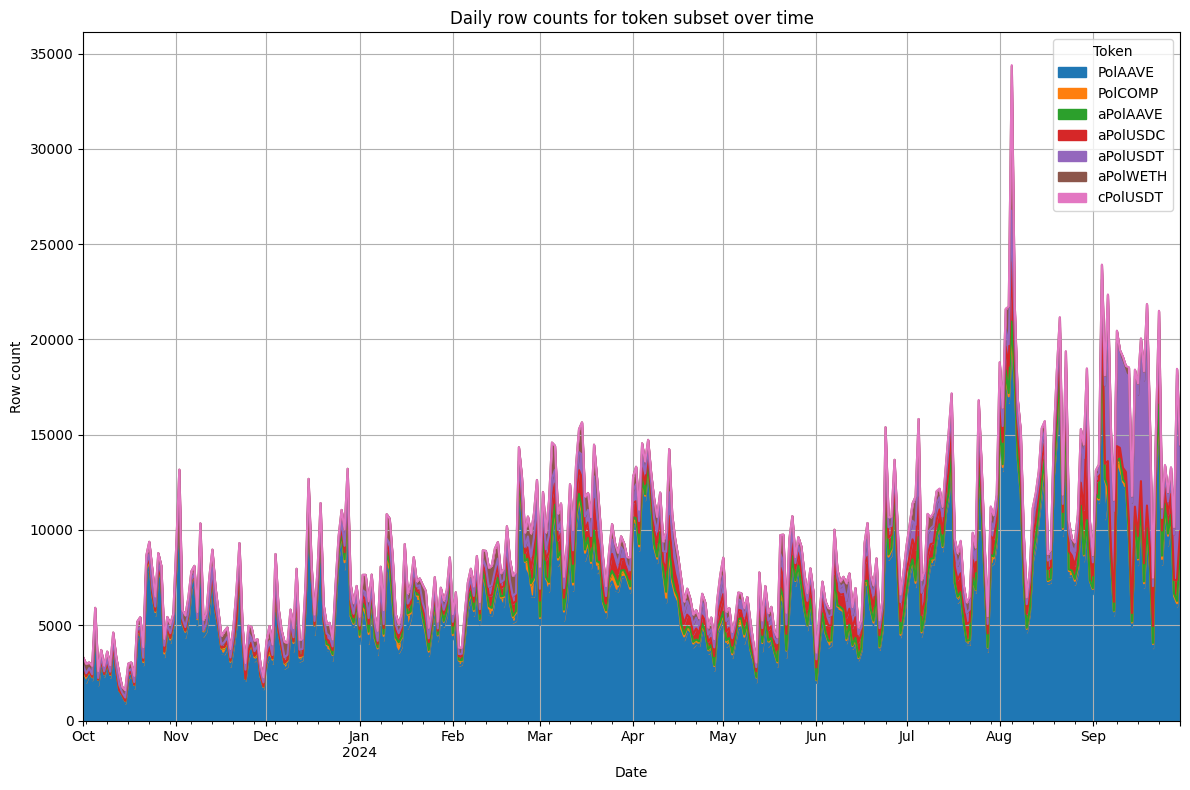

In [27]:
# token_subset = ['aOptAAVE', 'aOptUSDC', 'aOptUSDT', 'aOptWETH', 'cOptUSDC', 'cOptUSDT', 'cOptWETH', 'OptAAVE', 'OptCOMP'] # Optimism
# token_subset = ['AAVE', 'aEthAAVE', 'aEthUSDC', 'aEthUSDT', 'aEthWETH', 'stkAAVE', 'cCOMP', 'COMP', 'cUSDCv3', 'cUSDTv3', 'cWETHv3'] # Ethereum
# token_subset = ['aArbAAVE', 'aArbUSDC', 'aArbUSDT', 'aArbWETH', 'ArbAAVE', 'ArbCOMP', 'cArbUSDC', 'cArbUSDT', 'cArbWETH'] # Arbitrum
# token_subset = ['aBasUSDC', 'aBasWETH', 'BasCOMP', 'cBasUSDC', 'cBasWETH'] # Base
token_subset = ['aPolAAVE', 'aPolUSDC', 'aPolUSDT', 'aPolWETH', 'cPolUSDT', 'PolAAVE', 'PolCOMP'] # Polygon
# token_subset = ['aEthWETH', 'cWETHv3', 'aArbWETH', 'cArbWETH', 'aBasWETH', 'cBasWETH', 'aOptWETH', 'cOptWETH', 'aPolWETH'] # WETH
# token_subset = ['aEthUSDC', 'cUSDCv3', 'aArbUSDC', 'cArbUSDC', 'aBasUSDC', 'cBasUSDC', 'aOptUSDC', 'cOptUSDC', 'aPolUSDC'] # USDC
# token_subset = ['aEthUSDT', 'cUSDTv3', 'aArbUSDT', 'cArbUSDT', 'aOptUSDT', 'cOptUSDT', 'aPolUSDT', 'cPolUSDT'] # USDT

visualize_subset(token_subset)

In [3]:
transfers_df['token'].value_counts()

token
PolAAVE     2430318
aBasWETH    2408454
aArbWETH     719292
AAVE         575248
aArbUSDC     500104
aBasUSDC     464680
cBasWETH     463761
aOptWETH     350197
aArbUSDT     300707
aPolUSDT     300143
aPolWETH     240754
ArbAAVE      238703
aPolUSDC     217572
aEthWETH     183654
COMP         162112
BasCOMP      131278
PolCOMP      107658
ArbCOMP      104513
aOptUSDC      89667
OptAAVE       87657
cArbUSDC      86222
aOptUSDT      80641
aEthUSDC      53702
cBasUSDC      41506
aEthUSDT      38832
aPolAAVE      33859
stkAAVE       20369
cArbUSDT      20338
cArbWETH      20106
cOptUSDC      13770
cUSDCv3       13375
aEthAAVE       7608
aOptAAVE       6609
aArbAAVE       5905
cWETHv3        5646
OptCOMP        4685
cOptUSDT       3090
cPolUSDT       2177
cOptWETH       1477
cUSDTv3        1230
cCOMP          1050
Name: count, dtype: int64

## Null addresses

In [36]:
null_address = '0x0000000000000000000000000000000000000000'

transfers_df['is_null_address'] = ((transfers_df['from'] == null_address) | (transfers_df['to'] == null_address))

token_percentage = transfers_df.groupby('token')['is_null_address'].mean() * 100
token_percentage_sorted = token_percentage.sort_values()

In [38]:
token_percentage_sorted

token
AAVE          0.000000
cCOMP         0.000000
COMP          0.000000
PolAAVE       0.059128
ArbAAVE       0.186843
PolCOMP       0.195991
BasCOMP       0.217858
ArbCOMP       0.246859
OptAAVE       0.262386
OptCOMP       2.604055
aBasWETH     76.711492
aArbAAVE     77.358171
aOptWETH     77.584046
aArbWETH     78.357329
aOptAAVE     78.862158
aPolUSDC     79.933080
aEthWETH     82.293334
aPolAAVE     83.156620
stkAAVE      83.514164
aPolWETH     84.346262
aEthAAVE     86.829653
aArbUSDC     87.235455
aOptUSDT     88.203271
aEthUSDC     88.222040
aArbUSDT     88.722245
aPolUSDT     90.674445
aEthUSDT     90.755047
aOptUSDC     91.604492
aBasUSDC     95.111259
cArbUSDT    100.000000
cBasUSDC    100.000000
cBasWETH    100.000000
cWETHv3     100.000000
cOptUSDC    100.000000
cOptUSDT    100.000000
cOptWETH    100.000000
cPolUSDT    100.000000
cUSDCv3     100.000000
cUSDTv3     100.000000
cArbUSDC    100.000000
cArbWETH    100.000000
Name: is_null_address, dtype: float64

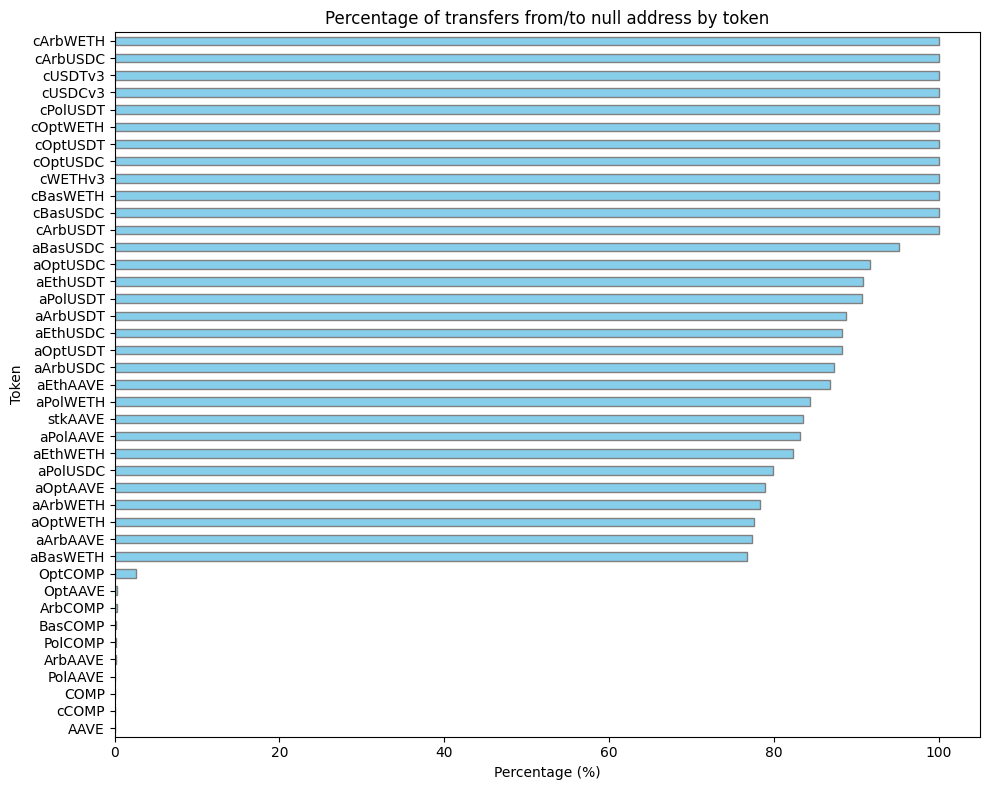

In [40]:
plt.figure(figsize=(10, 8))
token_percentage_sorted.plot(kind='barh', color='skyblue', edgecolor='gray')
plt.title('Percentage of transfers from/to null address by token')
plt.xlabel('Percentage (%)')
plt.ylabel('Token')
plt.tight_layout()
plt.show()

## Centrality metric comparison for tokens

In [ ]:
def compare_centrality_metrics(token):
    temp = transfers_df[transfers_df['token'] == token]
    
    G = nx.DiGraph()
    
    for i, j in temp.iterrows():
        G.add_edge(j['from'], j['to'], weight=j['value'])
        
    largest_weakly_cc = max(nx.weakly_connected_components(G), key=len)

    G = G.subgraph(largest_weakly_cc).copy()
    
    eigen = nx.eigenvector_centrality(G, max_iter=1000)
    betweenness_centrality = nx.betweenness_centrality(G, normalized=True)
    # katz = nx.katz_centrality(G, alpha=0.1, beta=1.0, max_iter=1000)
    # page = nx.pagerank(G, alpha=0.85)
    total_degree_centrality = nx.degree_centrality(G)
    in_degree_centrality = nx.in_degree_centrality(G)
    out_degree_centrality = nx.out_degree_centrality(G)
    
    df = pd.DataFrame({
        'Node': list(G.nodes),
        'Eigenvector': list(eigen.values()),
        'Betweenness': list(betweenness_centrality.values()),
        # 'Katz': list(katz.values()),
        # 'PageRank': list(page.values()),
        'Total Degree': list(total_degree_centrality.values()),
        'In-Degree': list(in_degree_centrality.values()),
        'Out-Degree': list(out_degree_centrality.values())
    })
    
    # corr_matrix = df[['Eigenvector', 'PageRank', 'In-Degree', 'Out-Degree', 'Total Degree', 'Betweenness']].corr()
    # sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
    # plt.title("Centrality Metrics Correlation Matrix")
    # plt.show()
    
    top_eigenvector = df.nlargest(5, 'Eigenvector')[['Node', 'Eigenvector']]
    top_betweenness = df.nlargest(5, 'Betweenness')[['Node', 'Betweenness']]
    top_total_degree = df.nlargest(5, 'Total Degree')[['Node', 'Total Degree']]
    top_in_degree = df.nlargest(5, 'In-Degree')[['Node', 'In-Degree']]
    top_out_degree = df.nlargest(5, 'Out-Degree')[['Node', 'Out-Degree']]
    print(f'Eigenvector:\n{top_eigenvector}\n\nBetweenness:\n{top_betweenness}\n\nTotal degree:\n{top_total_degree}\n\nIn-degree:\n{top_in_degree}\n\nOut-degree:\n{top_out_degree}')

    # pos = nx.spring_layout(G)
    # plt.figure(figsize=(12, 12))

    # nx.draw_networkx_nodes(G, pos, node_size=[1000 * df.set_index('Node')['Eigenvector'][node] for node in G.nodes()],
    #                        node_color='orange', alpha=0.6, label='Eigenvector')
    # nx.draw_networkx_nodes(G, pos, node_size=[1000 * df.set_index('Node')['Betweenness'][node] for node in G.nodes()],
    #                        node_color='yellow', alpha=0.6, label='Betweenness')
    # nx.draw_networkx_nodes(G, pos, node_size=[1000 * df.set_index('Node')['Total Degree'][node] for node in G.nodes()],
    #                        node_color='green', alpha=0.6, label='Total degree')
    # nx.draw_networkx_nodes(G, pos, node_size=[1000 * df.set_index('Node')['In-Degree'][node] for node in G.nodes()],
    #                        node_color='blue', alpha=0.6, label='In-degree')
    # nx.draw_networkx_nodes(G, pos, node_size=[1000 * df.set_index('Node')['Out-Degree'][node] for node in G.nodes()],
    #                        node_color='red', alpha=0.6, label='Out-degree')

    # nx.draw_networkx_edges(G, pos, alpha=0.3)
    # # plt.legend(['Eigenvector', 'Betweenness', 'Total degree'])
    # # plt.legend(['In-degree', 'Out-degree', 'Total degree'])
    # plt.title(f'{token} network')
    # plt.show()


In [ ]:
# tokens = ['aEthAAVE', 'aOptAAVE', 'aArbAAVE', 'cWETHv3', 'OptCOMP', 'cOptUSDT', 'cPolUSDT', 'cOptWETH', 'cUSDTv3', 'cCOMP']
# tokens = ['OptCOMP', 'cCOMP']
tokens = ['ArbCOMP']
# tokens = ['OptCOMP', 'OptAAVE', 'ArbCOMP', 'BasCOMP', 'PolCOMP', 'ArbAAVE', 'PolAAVE', 'COMP', 'AAVE', 'cCOMP']

for token in tokens:
    compare_centrality_metrics(token)